In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
# import the necessary packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from pandas import read_excel, DataFrame
import pandas as pd
import cv2
import numpy as np
import scipy
import pickle
import os
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
def crop(Image, offsetHauteur, offsetLargeur):
    hauteur = Image.shape[0]
    largeur = Image.shape[1]
    croped_image = Image[(hauteur//2 -offsetHauteur):(hauteur//2 +offsetHauteur),(largeur//2 -offsetLargeur):(largeur//2 +offsetLargeur)]
    return croped_image

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load your data into a DataFrame.
df_train = pd.read_excel('./kawkaw_trainData.xlsx')
df_test = pd.read_excel('./kawkaw_testData.xlsx')

# Set up the ImageDataGenerator.
datagen = ImageDataGenerator(rescale=1./255)

# Set up the data generator for training data.
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='./train_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw'
)

# Set up the data generator for test data.
test_generator = datagen.flow_from_dataframe(
    dataframe=df_test,
    directory='./test_resizedimages400/',
    x_col='Name',
    y_col=['Cu %', 'Fe %', 'Pb %', 'Zn %'],
    target_size=(400, 400),
    batch_size=32,
    class_mode='raw'
)

Found 4320 validated image filenames.
Found 2142 validated image filenames.


In [5]:
train_generator

In [6]:
tf.keras.backend.clear_session()

In [7]:
def create_cnna(width=128, height=128, depth=3):
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(width,height,depth)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation = 'linear'))
    return model


def create_cnn(width=400, height=400, depth=3):
    model = keras.models.Sequential()
    input_shape = (width, height, depth)
    
    model.add(layers.Conv2D(16, 3, strides=(1,1), padding="valid", activation='relu', input_shape=input_shape))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(16, 3, activation='relu'))
    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(16, 5, activation='relu'))
    model.add(layers.Conv2D(8, 5, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(8, 5, activation='relu'))
    model.add(layers.Conv2D(8, 3, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(8, 3, activation='relu'))
    model.add(layers.Conv2D(32, 3, activation='relu'))
    model.add(layers.MaxPool2D((2,2)))

    model.add(layers.Conv2D(1, 5, activation='relu'))
    model.add(layers.Flatten())

    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(4))
    
    return model

def save_model(model):
    # filename = '/CnnZn3RlCrop4004tGPU.h5'
    filename = '/CnnZnepochs50.h5'
    model.save(filename)
    print("Model is saved into : "+filename)

In [8]:
def loading_model():
    filename = '/CnnZnepochs50.h5'
    return load_model(filename)

In [10]:
model = create_cnna(width=400, height=400, depth=3)

In [11]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 398, 398, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 199, 199, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 199, 199, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_11 (Conv2D)          (None, 197, 197, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                      

In [12]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_absolute_percentage_error', metrics=["accuracy"])

# hyperparameters
epochs = 50

In [13]:
hist = model.fit(train_generator, epochs=epochs)


Epoch 1/50
135/135 [==============================] - 1005s 7s/step - loss: 159.2056 - accuracy: 0.3171
Epoch 2/50
135/135 [==============================] - 972s 7s/step - loss: 64.1133 - accuracy: 0.4477
Epoch 3/50
135/135 [==============================] - 1193s 9s/step - loss: 53.0729 - accuracy: 0.4514
Epoch 4/50
135/135 [==============================] - 1137s 8s/step - loss: 48.3713 - accuracy: 0.4419
Epoch 5/50
119/135 [=========================>....] - ETA: 1:53 - loss: 45.8053 - accuracy: 0.4428

KeyboardInterrupt: 

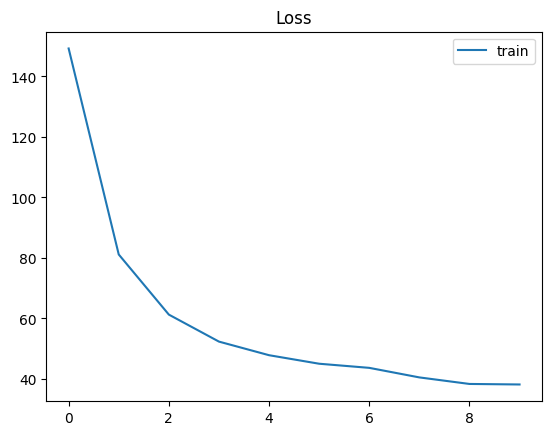

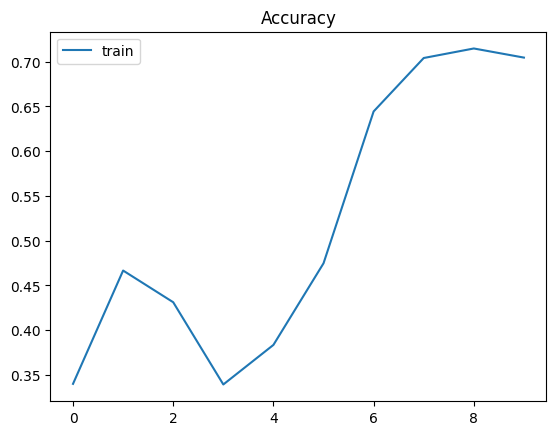

In [11]:
pyplot.title('Loss')
pyplot.plot(hist.history['loss'], label='train')
#pyplot.plot(hist.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

pyplot.title('Accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
#pyplot.plot(hist.history['val_accuracy'], label='validation')
pyplot.legend()
pyplot.show()

In [13]:
# Évaluer le modèle sur les données de test
evaluation = model.evaluate(test_generator)

# Afficher les métriques d'évaluation
print("Perte (Loss):", evaluation[0])
print("Métrique 1:", evaluation[1])
# print("Métrique 2:", evaluation[2])
# ...


67/67 [==============================] - 105s 2s/step - loss: 37.3874 - accuracy: 0.8660
Perte (Loss): 37.38736343383789
Métrique 1: 0.8660130500793457


In [18]:
filename = '/CnnZnepochs50.h5'
model.save(filename)

ICI LE CODE DE CNN RECENT

In [20]:
Model = load_model(filename)
pathVideo = "./video_dep/rl5_zn09_05_2022-2.mp4"

In [16]:
# Video = cv2.VideoCapture(pathIn)
# vid= pathIn.split("/")[2].split(".")[0]

def deploiement (pathVideo, Model):

    Teneur_predit = []
    Fe = []
    Cu = []
    Pb = []
    Zn = []
    count = 0

    Video = cv2.VideoCapture(pathVideo)
  
    while(Video.isOpened()):
        
        Video.set(cv2.CAP_PROP_POS_MSEC,(count*500))    # added this line 
        
        success, frame = Video.read()
        if success == False:
            break
 
        image = crop(frame,200,200)
      
            
        #prediction
            
        resized = cv2.resize(image, (400,400), interpolation = cv2.INTER_AREA)
        resized = resized/255.0
        resized = np.array(resized)
        resized = resized.reshape((1,400,400,3))
        #predict
        t = Model.predict(resized)
        
        #print(t)
        
        Teneur_predit.append(t)
    
        count=count+1
            
    # Calcul moyenne teneurs predites
 
    #Moyenne_teneur_predit_Pb = cal_quartil(Pb)
    #Moyenne_teneur_predit_Zn = cal_quartil(Zn)
    #Moyenne_teneur_predit_Cu = cal_quartil(Cu)
    #Moyenne_teneur_predit_Fe = cal_quartil(Fe)
    
    return Teneur_predit


def cal_quartil(data):
    data = DataFrame(data)
    #find absolute value of z-score for each observation
    z = np.abs(stats.zscore(data))
    #only keep rows in dataframe with all z-scores less than absolute value of 3 
    data_clean = data[(z<3).all(axis=1)]
    #find how many rows are left in the dataframe 
   
    #find Q1, Q3, and interquartile range for each column
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = data.apply(stats.iqr)
    #only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
    df = data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
    #find how many rows are left in the dataframe
    data_clean = np.average(df)
    
    return data_clean

def CalculMoyenneTenneursPredites(TabTenneursPredites):
    Fe = []
    Cu = []
    Pb = []
    Zn = []
    i = 0
    for i in range(0,len(TabTenneursPredites)):
        Cu.append(TabTenneursPredites[i][0][0])
        Fe.append(TabTenneursPredites[i][0][1])
        Pb.append(TabTenneursPredites[i][0][2])
        Zn.append(TabTenneursPredites[i][0][3])
        
        
        Moyenne_teneur_predit_Pb = cal_quartil(Pb)
        Moyenne_teneur_predit_Zn = cal_quartil(Zn)
        Moyenne_teneur_predit_Cu = cal_quartil(Cu)
        Moyenne_teneur_predit_Fe = cal_quartil(Fe)
        
    return Moyenne_teneur_predit_Cu, Moyenne_teneur_predit_Fe, Moyenne_teneur_predit_Pb, Moyenne_teneur_predit_Zn


def TenneurReel(Video, FileName):
    df = read_excel(FileName, sheet_name = 'Zn')
    for i in range(0, df.shape[0]):
        if Video == df['points'].values[i]:
            CuReel = df['Cu (%)'].values[i]
            FeReel = df['Fe (%)'].values[i]
            PbReel = df['Pb (%)'].values[i]
            ZnReel = df['Zn (%)'].values[i]
            
    return CuReel, FeReel, PbReel, ZnReel

# Element must be: Cu Pb Zn Fe
def PlotTenneurs(TeneurPredit, TeneurReel, Moyenne , Element):
    
    
    Ordre = {'Cu': 0 , 'Fe': 1, 'Pb': 2 , 'Zn':3 }
    
    TeneurPreditList = []
    plt.figure(figsize=(15,10))
    plt.title('Real Labels Vs Predicted Labels (' + Element+')')
    plt.ylabel(Element + '% Value')
    plt.xlabel('Image ID')


    for i in range (0, len(TeneurPredit)):
        TeneurPreditList.append(Teneur_predit[i][0][Ordre[Element]])
                
    y=TeneurPreditList
    x=TeneurReel[Ordre[Element]]
    Avg_normale = np.average(TeneurPreditList)
    QuartMoyenne = Moyenne[Ordre[Element]]
        
    plt.plot(y, 'ro-')

    plt.axhline(y = x, color = 'b', linestyle = '--')
    plt.axhline(y = QuartMoyenne, color = 'y', linestyle = '--')
    plt.axhline(y = Avg_normale, color = 'g', linestyle = '--')

    plt.legend(['Predicted','Real', 'Moyenne Quartile', 'Moyenne normale'], loc='upper right')
    plt.show()
    
    return

In [17]:
Teneur_predit = deploiement (pathVideo, Model)

In [18]:
Moyenne = CalculMoyenneTenneursPredites(Teneur_predit)

In [19]:
Moyenne

(0.96645075, 13.22667, 1.8997092, 39.701294)

In [20]:
TeneurReel=TenneurReel("rl5_zn09_05_2022-2.mp4","DataSource.xlsx")

In [21]:
TeneurReel

(0.78, 12.4, 0.34, 49.5)

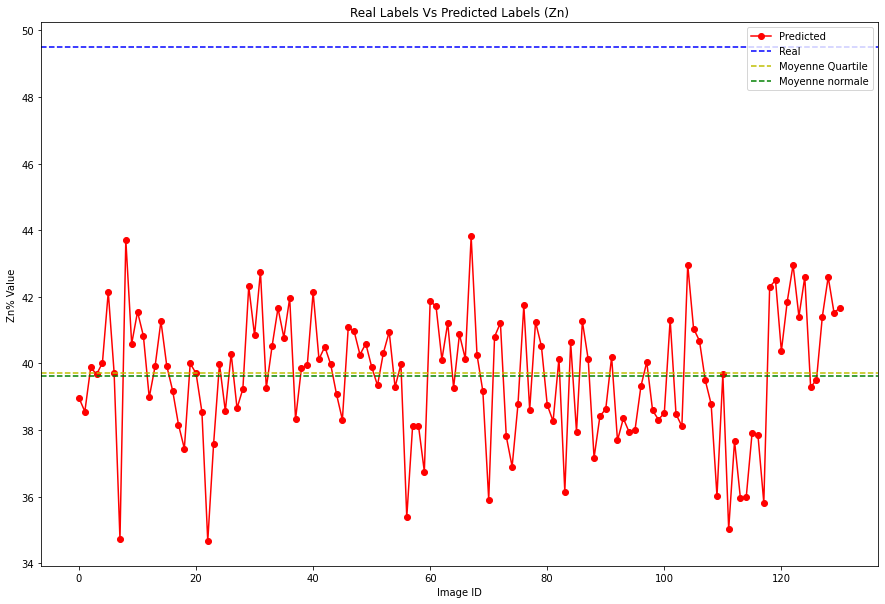

In [22]:
PlotTenneurs(Teneur_predit, TeneurReel, Moyenne , 'Zn')